In [4]:
# 기본
import pandas as pd
import numpy as np

# Warnings   
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

import re
import urllib.request

# 시각화
%matplotlib inline
import matplotlib.pyplot as plt

# text 처리
import re
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
import gensim      # 주피터에서는 pip 사용
from gensim.utils import simple_preprocess

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 훈련 및 모델 생성
import sklearn
import keras
from sklearn.model_selection import train_test_split

# 1D CNN
from tensorflow.keras.layers import Conv1D, Dropout, GlobalMaxPool1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# GRU
from tensorflow.keras.layers import GRU

# confusion matrix
from sklearn.metrics import confusion_matrix     
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/data/appliances_no_null_values.csv')

In [6]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [7]:
temp = []
data_to_list = df['review_text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['complete package I like the fact that the wire ends have mounting tips assembled and that the cord has a strain relief clamp included. Id recommend this to any diy person',
 'Perfect Fit Needed another couple of feet with new dryer, perfect fit. Gives you more options then the shorter cords normally sold.',
 'Everything works Good quality at a reasonable price',
 '50 amp cable Planning on hooking this to my RV',
 'Good range cord, standard nema 14-50p fits with nema 14-50r This product is a pretty simple one. I do like prettymuch any product made by Southwire, they make good stuff. Coleman cable is now a subsidiary of Southwire. If you go to your big box stores, most of the Romex youll buy is made by Southwire, same with THHN / THWN youd buy for conduit. I like to stick with brands I trust to make good products. I have no particular complaints about this, fits well in Leviton 14-50r as expected. Well constructed and sturdy. I like the 6-foot model so its easier to install and pull ou

In [8]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['complete', 'package', 'like', 'the', 'fact', 'that', 'the', 'wire', 'ends', 'have', 'mounting', 'tips', 'assembled', 'and', 'that', 'the', 'cord', 'has', 'strain', 'relief', 'clamp', 'included', 'id', 'recommend', 'this', 'to', 'any', 'diy', 'person'], ['perfect', 'fit', 'needed', 'another', 'couple', 'of', 'feet', 'with', 'new', 'dryer', 'perfect', 'fit', 'gives', 'you', 'more', 'options', 'then', 'the', 'shorter', 'cords', 'normally', 'sold'], ['everything', 'works', 'good', 'quality', 'at', 'reasonable', 'price'], ['amp', 'cable', 'planning', 'on', 'hooking', 'this', 'to', 'my', 'rv'], ['good', 'range', 'cord', 'standard', 'nema', 'fits', 'with', 'nema', 'this', 'product', 'is', 'pretty', 'simple', 'one', 'do', 'like', 'prettymuch', 'any', 'product', 'made', 'by', 'southwire', 'they', 'make', 'good', 'stuff', 'coleman', 'cable', 'is', 'now', 'subsidiary', 'of', 'southwire', 'if', 'you', 'go', 'to', 'your', 'big', 'box', 'stores', 'most', 'of', 'the', 'romex', 'youll', 'buy', 'is'

In [9]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [10]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['complete package like the fact that the wire ends have mounting tips assembled and that the cord has strain relief clamp included id recommend this to any diy person', 'perfect fit needed another couple of feet with new dryer perfect fit gives you more options then the shorter cords normally sold', 'everything works good quality at reasonable price', 'amp cable planning on hooking this to my rv', 'good range cord standard nema fits with nema this product is pretty simple one do like prettymuch any product made by southwire they make good stuff coleman cable is now subsidiary of southwire if you go to your big box stores most of the romex youll buy is made by southwire same with thhn thwn youd buy for conduit like to stick with brands trust to make good products have no particular complaints about this fits well in leviton as expected well constructed and sturdy like the foot model so its easier to install and pull out my range if needed installation is simple with the prongs crimped 

In [11]:
# clean_text 컬럼 생성
df['clean_text'] = data

In [12]:
df.head()

,rating,reviewer_id,product_id,unix_review_time,category,description,also_buy,brand,main_cat,price,review_text,rating_class,time,clean_text
0,5,A2OXDRWBASV91Y,B00004SQHD,1366416000,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,complete package I like the fact that the wire...,good,2013-04-20,complete package like the fact that the wire e...
1,5,A2KG6AWJSWILPR,B00004SQHD,1363392000,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,Perfect Fit Needed another couple of feet with...,good,2013-03-16,perfect fit needed another couple of feet with...
2,5,A2CBE6VYOARZN4,B00004SQHD,1487030400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,Everything works Good quality at a reasonable ...,good,2017-02-14,everything works good quality at reasonable price
3,5,AVKOTZD5ZIOX5,B00004SQHD,1482278400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,50 amp cable Planning on hooking this to my RV,good,2016-12-21,amp cable planning on hooking this to my rv
4,5,A33DUVUIC7G553,B00004SQHD,1460678400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,"Good range cord, standard nema 14-50p fits wit...",good,2016-04-15,good range cord standard nema fits with nema t...


# category test

In [ ]:
crop = pd.DataFrame(df['category'])

In [ ]:
crop.isnull().sum()

category    0
dtype: int64

In [ ]:
crop = crop['category'].tolist()

In [ ]:
len(crop)

446474

In [ ]:
crop[:5]

["['Appliances', 'Parts & Accessories', 'Range Parts & Accessories']",
 "['Appliances', 'Parts & Accessories', 'Range Parts & Accessories']",
 "['Appliances', 'Parts & Accessories', 'Range Parts & Accessories']",
 "['Appliances', 'Parts & Accessories', 'Range Parts & Accessories']",
 "['Appliances', 'Parts & Accessories', 'Range Parts & Accessories']"]

In [ ]:
import ast

In [ ]:
temp = []
for x in crop:
    temp.append(ast.literal_eval(x))

[['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessori

In [ ]:
temp[:5]

[['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories'],
 ['Appliances', 'Parts & Accessories', 'Range Parts & Accessories']]

In [ ]:
crop_unique = [list(x) for x in set(tuple(x) for x in temp)]

In [ ]:
crop_unique[:2]

[['Appliances',
  'Parts &amp; Accessories',
  'Humidifier Parts &amp; Accessories',
  'Accessories'],
 ['Appliances',
  'Refrigerators, Freezers & Ice Makers',
  'Beverage Refrigerators']]

In [ ]:
crop_one = []
for x in range(len(crop_unique)):
    if len(crop_unique[x]) >= 2:
        crop_unique[x][1] = re.sub('&amp;', '&', crop_unique[x][1])
        crop_one.append(crop_unique[x][1])
    else:
            crop_one.append('no')

In [ ]:
from collections import Counter

In [ ]:
Counter(crop_one)

Counter({'Dishwashers': 3,
         'Garbage Disposals & Compactors': 2,
         'Laundry Appliances': 6,
         'Parts & Accessories': 74,
         'Ranges, Ovens & Cooktops': 15,
         'Refrigerators, Freezers & Ice Makers': 11,
         'no': 1})

In [ ]:
crop_total = []
for x in range(len(temp)):
    if len(temp[x]) >= 2:
        temp[x][1] = re.sub('&amp;', '&', temp[x][1])
        crop_total.append(temp[x][1])
    else:
        crop_total.append('no')

In [ ]:
Counter(crop_total)

Counter({'Dishwashers': 510,
         'Garbage Disposals & Compactors': 180,
         'Laundry Appliances': 4578,
         'Parts & Accessories': 411268,
         'Ranges, Ovens & Cooktops': 12617,
         'Refrigerators, Freezers & Ice Makers': 14698,
         'no': 2623})

In [ ]:
len(crop_total)

446474

In [ ]:
df['cat'] = crop_total

In [ ]:
df

,rating,reviewer_id,product_id,unix_review_time,category,description,also_buy,brand,main_cat,price,review_text,rating_class,time,clean_text,cat
0,5,A2OXDRWBASV91Y,B00004SQHD,1366416000,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,complete package I like the fact that the wire...,good,2013-04-20,complete package like the fact that the wire e...,Parts & Accessories
1,5,A2KG6AWJSWILPR,B00004SQHD,1363392000,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,Perfect Fit Needed another couple of feet with...,good,2013-03-16,perfect fit needed another couple of feet with...,Parts & Accessories
2,5,A2CBE6VYOARZN4,B00004SQHD,1487030400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,Everything works Good quality at a reasonable ...,good,2017-02-14,everything works good quality at reasonable price,Parts & Accessories
3,5,AVKOTZD5ZIOX5,B00004SQHD,1482278400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,50 amp cable Planning on hooking this to my RV,good,2016-12-21,amp cable planning on hooking this to my rv,Parts & Accessories
4,5,A33DUVUIC7G553,B00004SQHD,1460678400,"['Appliances', 'Parts & Accessories', 'Range P...",['Coleman Cable 09045 5-Foot Range Cord Made o...,[],Coleman Cable,Tools & Home Improvement,$1.41,"Good range cord, standard nema 14-50p fits wit...",good,2016-04-15,good range cord standard nema fits with nema t...,Parts & Accessories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446469,5,A24A9P4F2SLTK5,B01HJH2PY0,1502323200,"['Appliances', 'Parts & Accessories', 'Dishwas...",['This is an authorized aftermarket product. F...,[],Bosch,Tools & Home Improvement,$101.13,Five Stars perfect replacement for our broken ...,good,2017-08-10,five stars perfect replacement for our broken one,Parts & Accessories
446470,2,A2JCB4KHBWEELW,B01HJHHEA0,1533081600,"['Appliances', 'Parts & Accessories', 'Range P...",['This is an O.E.M. Authorized part. Fits with...,['B00O9ZFAF2'],Frigidaire,Tools & Home Improvement,$14.99,"Two Stars Quick delivery, did not fit my stove.",bad,2018-08-01,two stars quick delivery did not fit my stove,Parts & Accessories
446471,5,A1LDYYVTLPP2Z5,B01HJHHEA0,1523577600,"['Appliances', 'Parts & Accessories', 'Range P...",['This is an O.E.M. Authorized part. Fits with...,['B00O9ZFAF2'],Frigidaire,Tools & Home Improvement,$14.99,Five Stars Perfect match for my oven!,good,2018-04-13,five stars perfect match for my oven,Parts & Accessories
446472,1,AP1M5O06IOYZ7,B01HJH92JQ,1521763200,"['Appliances', 'Parts & Accessories']",['This is an authorized aftermarket product. F...,[],Bosch,Tools & Home Improvement,$40.23,Doesn't work with Bosch SHX33A06UC/14 dishwash...,bad,2018-03-23,doesnt work with bosch shx uc dishwasher the s...,Parts & Accessories


# y 다른방식

In [13]:
df_sort = df[['clean_text', 'rating_class']]
df_sort = df_sort.sort_values(by='rating_class')
df_sort.head()

,clean_text,rating_class
184830,one star housing came broken,bad
366770,not helpful for traveling washing machine thes...,bad
68558,doesnt work does not stick to granites rough s...,bad
188932,jenn air knob no problem with the purchase how...,bad
210194,one star returned the item it didnt fit my dryer,bad


In [14]:
df_sort.groupby('rating_class').nunique()

,clean_text
rating_class,
bad,47594
good,330217


In [15]:
review_df = df_sort[:100_000]

In [16]:
review_df['rating_class'].value_counts()

good    51075
bad     48925
Name: rating_class, dtype: int64

In [17]:
review_df['rating_class'] = review_df['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [18]:
x = review_df['clean_text'].fillna('')
y = review_df['rating_class']

In [19]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=3_000)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
reviews = pad_sequences(sequences, maxlen=200)
print(reviews)

[[   0    0    0 ...  730  127  243]
 [   0    0    0 ...   95    1 1458]
 [   0    0    0 ...    4  828  205]
 ...
 [   0    0    0 ...  935   88 1381]
 [   0    0    0 ...   10   97   27]
 [   0    0    0 ...  103   99   79]]


In [20]:
reviews.shape, y.shape

((100000, 200), (100000,))

In [21]:
x_train_full, x_test, y_train_full, y_test = train_test_split(reviews, y, test_size=0.15)

In [22]:
y_train_full.value_counts(), y_test.value_counts()

(1    43467
 0    41533
 Name: rating_class, dtype: int64, 1    7608
 0    7392
 Name: rating_class, dtype: int64)

In [23]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.15, stratify=y_train_full)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((72250, 200), (12750, 200), (72250,), (12750,))

In [24]:
import tensorflow as tf

In [25]:
y_train= tf.keras.utils.to_categorical(y_train, 2, dtype="float32")
y_val = tf.keras.utils.to_categorical(y_val, 2, dtype="float32")
y_test = tf.keras.utils.to_categorical(y_test, 2, dtype="float32")

In [26]:
model = Sequential()
model.add(Embedding(3_000, 256))
model.add(Dropout(0.3))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [27]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='acc')
history = model.fit(x_train, y_train, epochs=100, callbacks=[es, mc], validation_split=0.2)

Epoch 1/100
1807/1807 [==============================] - 62s 17ms/step - loss: 0.2371 - acc: 0.8987 - val_loss: 0.1363 - val_acc: 0.9494

Epoch 00001: val_acc improved from -inf to 0.94941, saving model to best_model.h5
Epoch 2/100
1807/1807 [==============================] - 30s 16ms/step - loss: 0.1089 - acc: 0.9614 - val_loss: 0.1324 - val_acc: 0.9512

Epoch 00002: val_acc improved from 0.94941 to 0.95121, saving model to best_model.h5
Epoch 3/100
1807/1807 [==============================] - 30s 17ms/step - loss: 0.0808 - acc: 0.9727 - val_loss: 0.1387 - val_acc: 0.9534

Epoch 00003: val_acc improved from 0.95121 to 0.95336, saving model to best_model.h5
Epoch 4/100
1807/1807 [==============================] - 30s 17ms/step - loss: 0.0554 - acc: 0.9817 - val_loss: 0.1550 - val_acc: 0.9511

Epoch 00004: val_acc did not improve from 0.95336
Epoch 5/100
1807/1807 [==============================] - 30s 16ms/step - loss: 0.0387 - acc: 0.9869 - val_loss: 0.1774 - val_acc: 0.9500

Epoch 00

In [29]:
hist = pd.DataFrame(history.history)

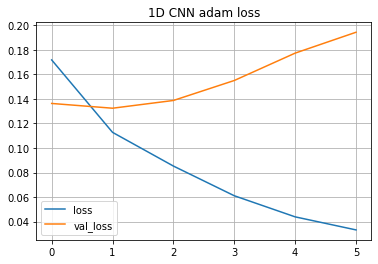

In [30]:
hist[['loss', 'val_loss']].plot()
plt.title('1D CNN adam loss')
plt.grid()
plt.show()

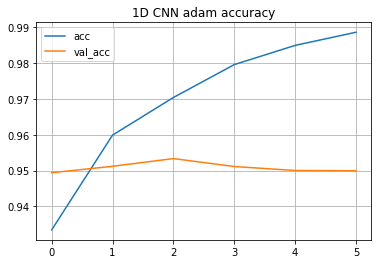

In [31]:
hist[['acc', 'val_acc']].plot()
plt.title('1D CNN adam accuracy')
plt.grid()
plt.show()

In [32]:
best_model = keras.models.load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test, verbose=1)
pred = best_model.predict(x_test)
print('model accuracy:', test_acc)

469/469 [==============================] - 2s 4ms/step - loss: 0.1289 - acc: 0.9533
model accuracy: 0.95333331823349


In [33]:
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(pred, decimals=0).argmax(axis=1))

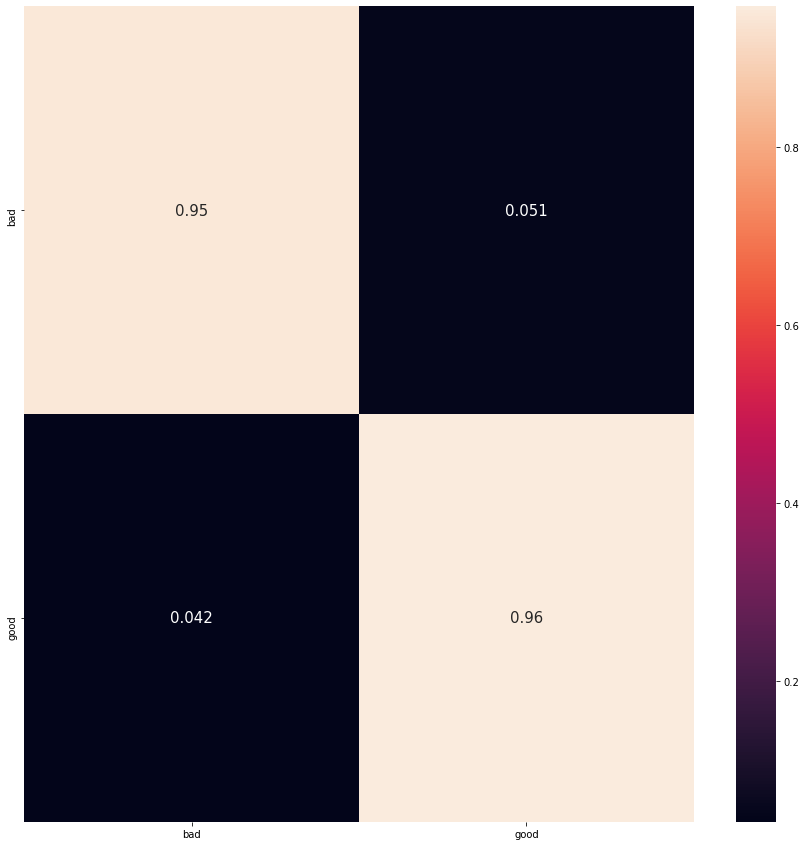

In [34]:
import seaborn as sns
conf_matrix = pd.DataFrame(matrix, index = ['bad', 'good'], columns=['bad', 'good'])
# Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(15, 15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})
plt.show()